[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
You stock changed 0.455 % during this period
You index: 'SPY' changed -0.041 %
You stock beat the market!


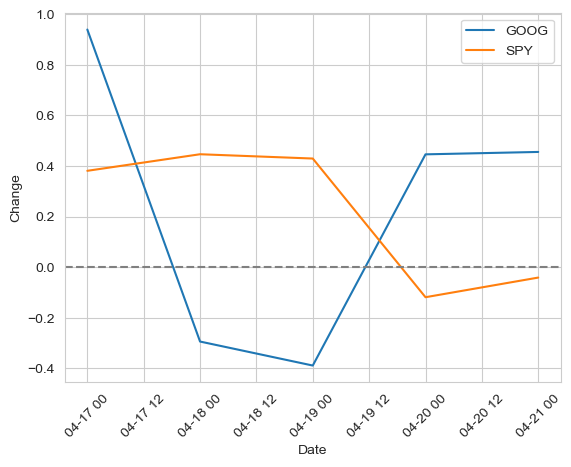

In [1]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

stock_name = input('What is your stock ticker?').upper()
index_name = input('What is the index for inference?\n1 for S&P 500\n2 for Nasdaq\n3 for Dow Jones Industrial Average')
if index_name == '1':
    index_name = 'SPY'
elif index_name == '2':
    index_name = '^NDX'
elif index_name == '3':
    index_name = '^DJI'

y_n = input("Do you want look at stock movement in one period of time, I can calculate for you if you type 'y', "
            "otherwise type 'n'")
if y_n == 'y':
    start_or_end = input("Type 1 to start from start date, type 2 to start from end date")
    valid_input = False
    if start_or_end == '1':
        start = dt.datetime.strptime(input("Enter your start date!"), "%Y,%m,%d")
        while not valid_input:
            period_format = input("Type 'd' for day\nType 'w' for week\nType 'm' for month\nType 'y' for year")
            if period_format == 'd':
                unit_period = input("How many days?")
                end = start + relativedelta(days=int(unit_period))
                valid_input = True
            elif period_format == 'w':
                unit_period = input("How many weeks?")
                end = start + relativedelta(weeks=int(unit_period))
                valid_input = True
            elif period_format == 'm':
                unit_period = input("How many months?")
                end = start + relativedelta(months=int(unit_period))
                valid_input = True
            elif period_format == 'y':
                unit_period = input("How many years?")
                end = start + relativedelta(years=int(unit_period))
                valid_input = True
            else:
                print('Please type d, w, m or y!')
    elif start_or_end == '2':
        end = input("Enter your end date! (You can also type 'today' for today's date)").upper()
        if end == 'TODAY':
            end = dt.datetime.today()
        else:
            end = dt.datetime.strptime(end, "%Y,%m,%d")
        while not valid_input:
            period_format = input("Type 'd' for day\nType 'w' for week\nType 'm' for month\nType 'y' for year")
            if period_format == 'd':
                unit_period = input("How many days?")
                start = end - relativedelta(days=int(unit_period))
                valid_input = True
            elif period_format == 'w':
                unit_period = input("How many weeks?")
                start = end - relativedelta(weeks=int(unit_period))
                valid_input = True
            elif period_format == 'm':
                unit_period = input("How many months?")
                start = end - relativedelta(months=int(unit_period))
                valid_input = True
            elif period_format == 'y':
                unit_period = input("How many years?")
                start = end - relativedelta(years=int(unit_period))
                valid_input = True
            else:
                print('Please type d, w, m or y!')
else:
    start = dt.datetime.strptime(input("Enter your start date!"), "%Y,%m,%d")
    end = input("Enter your start date!").upper()
    if end == 'TODAY':
        end = dt.datetime.today()
    else:
        end = dt.datetime.strptime(end, "%Y,%m,%d")

my_stock = yf.download(stock_name, start=start, end=end)
index = yf.download(index_name, start=start, end=end)

my_price_change = round(((my_stock.iloc[-1, 3] - my_stock.iloc[0, 0]) / my_stock.iloc[0, 0]) * 100, 3)
index_price_change = round(((index.iloc[-1, 3] - index.iloc[0, 0]) / index.iloc[0, 0]) * 100, 3)

print(f'You stock changed {my_price_change} % during this period')
print(f"You index: '{index_name}' changed {index_price_change} %")
if my_price_change > index_price_change:
    print('You stock beat the market!')
else:
    print("You didn't beat the market.")

for i in range(len(my_stock)):
    my_stock['Change'] = ((my_stock['Close'] - my_stock['Open'][0]) / my_stock['Open'][0]) * 100
for i in range(len(index)):
    index['Change'] = ((index['Close'] - index['Open'][0]) / index['Open'][0]) * 100

sns.lineplot(x='Date', y='Change', data=my_stock, label=stock_name)
sns.lineplot(x='Date', y='Change', data=index, label=index_name)
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--')
plt.legend()
plt.show()

In [2]:
my_stock

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2023-04-17 00:00:00-04:00,105.430000,106.709999,105.320000,106.419998,106.419998,29043400,0.939010
2023-04-18 00:00:00-04:00,107.000000,107.050003,104.779999,105.120003,105.120003,17641400,-0.294032
2023-04-19 00:00:00-04:00,104.214996,105.724998,103.800003,105.019997,105.019997,16732000,-0.388887
2023-04-20 00:00:00-04:00,104.650002,106.888000,104.639999,105.900002,105.900002,22515300,0.445795
2023-04-21 00:00:00-04:00,106.089996,106.639999,105.489998,105.910004,105.910004,21341575,0.455282


In [3]:
index

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2023-04-17 00:00:00-04:00,412.369995,413.959991,411.089996,413.940002,413.940002,66436400,0.380728
2023-04-18 00:00:00-04:00,415.579987,415.720001,412.779999,414.209991,414.209991,63560000,0.446200
2023-04-19 00:00:00-04:00,412.220001,415.079987,412.160004,414.140015,414.140015,55227300,0.429231
2023-04-20 00:00:00-04:00,411.209991,413.700012,410.269989,411.880005,411.880005,75840400,-0.118823
2023-04-21 00:00:00-04:00,412.190002,412.679993,410.179993,412.200012,412.200012,72944154,-0.041221
